## This notebook demonstrates the use of a CNN to classify images from the cifar10 dataset

### Import necessary modules

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


### Import the train and test image dataset

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print("Data Downloaded")

Data Downloaded


### Examine the shape of train and test images

In [3]:
print("Shape of training image dataset :{}".format(X_train.shape))
print("Shape of training label dataset:{}".format(y_train.shape))
print("Shape of testing image dataset:{}".format(X_test.shape))
print("Shape of testing label dataset:{}".format(y_test.shape))

Shape of training image dataset :(50000, 32, 32, 3)
Shape of training label dataset:(50000, 1)
Shape of testing image dataset:(10000, 32, 32, 3)
Shape of testing label dataset:(10000, 1)


### Visualize the first 36 images from training dataset

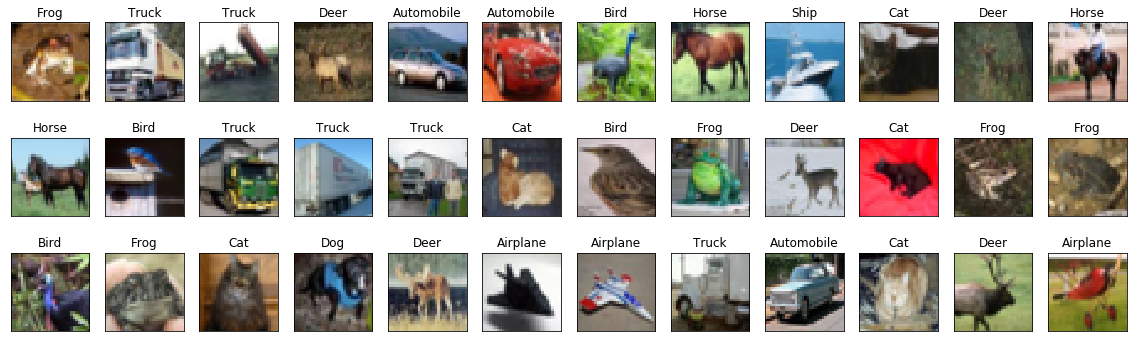

In [4]:
StringLabels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
fig = plt.figure(figsize=(20,6))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i])
    ax.set_title(StringLabels[y_train[i][0]])

### Normalize the images for better convergence

In [5]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

### One-hot encode the labels

In [6]:
num_classes = 10
print("First training label:{}".format(y_train[0]))
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
print("One-hot encoded first training label:{}".format(y_train[0]))

First training label:[6]
One-hot encoded first training label:[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


### Split the train set into validation set

In [7]:
X_train,X_valid = X_train[5000:],X_train[:5000]
y_train,y_valid = y_train[5000:],y_train[:5000]
print("Shape of train validation set:{}".format(X_valid.shape))

Shape of train validation set:(5000, 32, 32, 3)


### Build the ConvNet Model

In [8]:
model =  Sequential()
model.add(Conv2D(filters=16,padding='same',activation='relu',kernel_size=2,input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,padding='same',activation='relu',kernel_size=2))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes,activation='softmax'))

### Model Summary

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### Compile the model

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Run the model

In [17]:
Checkpointer = ModelCheckpoint(filepath='cifar10-cnn.hdf5',save_best_only=True,verbose=2)
model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_valid,y_valid),shuffle=True,verbose=2,callbacks=[Checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.73840, saving model to cifar10-cnn.hdf5
12s - loss: 0.6441 - acc: 0.7724 - val_loss: 0.7384 - val_acc: 0.7444
Epoch 2/20
Epoch 00001: val_loss improved from 0.73840 to 0.73532, saving model to cifar10-cnn.hdf5
12s - loss: 0.5882 - acc: 0.7893 - val_loss: 0.7353 - val_acc: 0.7458
Epoch 3/20
Epoch 00002: val_loss did not improve
11s - loss: 0.5599 - acc: 0.7968 - val_loss: 0.7356 - val_acc: 0.7470
Epoch 4/20
Epoch 00003: val_loss improved from 0.73532 to 0.73159, saving model to cifar10-cnn.hdf5
12s - loss: 0.5511 - acc: 0.8042 - val_loss: 0.7316 - val_acc: 0.7458
Epoch 5/20
Epoch 00004: val_loss improved from 0.73159 to 0.73011, saving model to cifar10-cnn.hdf5
12s - loss: 0.5374 - acc: 0.8071 - val_loss: 0.7301 - val_acc: 0.7534
Epoch 6/20
Epoch 00005: val_loss improved from 0.73011 to 0.72443, saving model to cifar10-cnn.hdf5
12s - loss: 0.5323 - acc: 0.8089 - val_loss: 0.7244 - va

### Load the best parameters

In [18]:
model.load_weights(filepath='cifar10-cnn.hdf5')

### Test the model

In [19]:
score = model.evaluate(X_test,y_test,verbose=0)
print("\n Accuracy:{}".format(score[1]))


 Accuracy:0.8217


### Prediction

Prediction:Bird


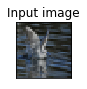

In [55]:
#This prediction is largely biased as the model has been trained on the images which are used to make the prediction
#This prediction is shown only to demonstrate how a model predicts the outcome of a given image
#Change the index to change the images[Index number ranges from 0 to 45000]

index = 16
Production_image = X_train[index].reshape(-1,32,32,3)
prediction = model.predict(Production_image)
fig = plt.figure(figsize=(1,4))
ax = fig.add_subplot(1,1,1,xticks=[],yticks=[])
ax.set_title("Input image")
ax.imshow(X_train[index])
print("Prediction:{}".format(StringLabels[np.argmax(prediction)]))